# Praca z danymi czasowymi

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data/airline-passengers.csv', usecols=[1])
data.columns = ["y"]
data.head()

,y
0,112
1,118
2,132
3,129
4,121


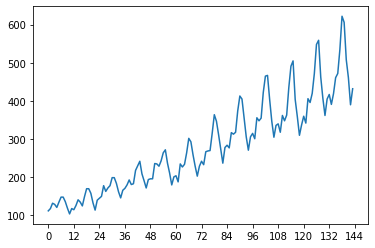

In [4]:
plt.plot(range(data.shape[0]), data.y)
plt.xticks(np.arange(0,150, 12))
plt.show()

In [5]:
data.y.shift(1)

0        NaN
1      112.0
2      118.0
3      132.0
4      129.0
       ...  
139    622.0
140    606.0
141    508.0
142    461.0
143    390.0
Name: y, Length: 144, dtype: float64

In [6]:
data["y_1"] = data.y.shift(1)
data

,y,y_1
0,112,NaN
1,118,112.0
2,132,118.0
3,129,132.0
4,121,129.0
...,...,...
139,606,622.0
140,508,606.0
141,461,508.0
142,390,461.0


Dla 12 kroków:

In [7]:
for i in range(2, 13):
    data["y_"+str(i)] = data.y.shift(i)
data.head()

,y,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
0,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail(3)

,y,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
141,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
142,390,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0
143,432,390.0,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0


In [9]:
data = data.dropna()
data

,y,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
12,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
13,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
14,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
15,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
16,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
140,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
141,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
142,390,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0


In [10]:
X = data.loc[:,"y_1":"y_12"]
y = data.y

X.head()

,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
12,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
13,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
14,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
15,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
16,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0


In [11]:
n_train = 108
X_train, y_train = X.iloc[:n_train], y.iloc[:n_train]
X_test, y_test = X.iloc[n_train:], y.iloc[n_train:]

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
model = RandomForestRegressor(max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [14]:
y_pred = model.predict(X_test)
err = mean_absolute_percentage_error(y_test, y_pred)
err

0.07538070654697888

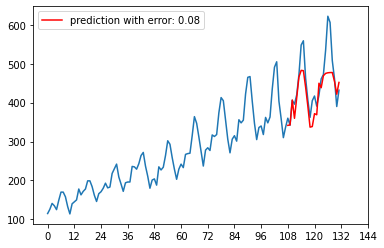

In [15]:
N = data.shape[0]
plt.plot(range(N), data.y)
plt.plot(range(n_train, N), y_pred, 
         color = "red", label=f"prediction with error: {err.round(2)}")

plt.xticks(np.arange(0,150, 12))
plt.legend()
plt.show()

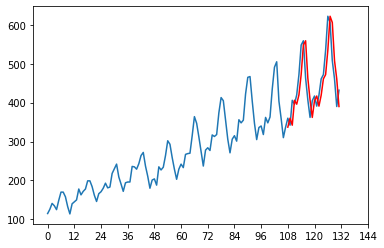

In [16]:
plt.plot(range(N), data.y)
plt.plot(range(n_train, N), X_test.y_1, color = "red")

plt.xticks(np.arange(0,150, 12))
plt.show()

In [17]:
y_pred_dummy = X_test.y_1

In [18]:
mean_absolute_percentage_error(y_test, y_pred_dummy)

0.09729930052564972

## Inżynieria cech dla szeregów czasowych

In [19]:
X.head(2)

,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
12,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
13,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0


In [20]:
X["mean_1_12"] = X.mean(1)
X["var_1_12"] = X.var(1)
X["range_1_12"] = X.max(1) - X.mean(1)

X.head(2)

,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,mean_1_12,var_1_12,range_1_12
12,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0,126.666667,172.555556,42.611111
13,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,126.916667,165.909722,36.207837


In [21]:
model = RandomForestRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
err = mean_absolute_percentage_error(y_test, y_pred)
err

0.0719714954231676

In [22]:
y_preds = list(y_train.iloc[-12:])
y_preds

[340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337]

In [23]:
model.predict(np.array(y_preds).reshape((1,-1)))

array([351.2882696])

In [24]:
for i in range(X_test.shape[0]):
    y_pred_i = model.predict(np.array(y_preds[-12:]).reshape((1,-1)))[0]
    y_preds.append(y_pred_i)

In [25]:
y_preds[12:]

[351.28826960268833,
 347.9865280468585,
 350.537410622616,
 348.1955474433117,
 355.7343366541009,
 389.30885437438366,
 442.1653333333334,
 471.62666666666667,
 470.14849206349203,
 463.0564920634921,
 460.05077777777774,
 459.0801587301587,
 462.93682539682544,
 462.606,
 460.466,
 463.6726666666667,
 465.2226666666667,
 468.2426666666667,
 479.856,
 481.325,
 481.325,
 481.325,
 480.765,
 480.765]

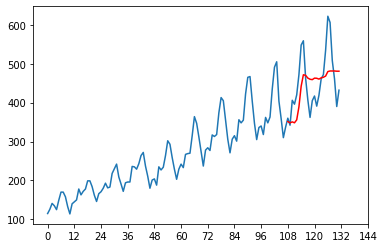

In [26]:
plt.plot(range(N), data.y)
plt.plot(range(n_train, N), y_preds[12:], color = "red")

plt.xticks(np.arange(0,150, 12))
plt.show()

In [27]:
from sklearn.model_selection import TimeSeriesSplit
?TimeSeriesSplit

In [28]:
tscv = TimeSeriesSplit(n_splits=5, test_size=2)

In [29]:
X = range(16)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1 2 3 4 5] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15]


In [30]:
tscv = TimeSeriesSplit(n_splits=5, max_train_size=5, test_size=2)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 2 3 4 5] TEST: [6 7]
TRAIN: [3 4 5 6 7] TEST: [8 9]
TRAIN: [5 6 7 8 9] TEST: [10 11]
TRAIN: [ 7  8  9 10 11] TEST: [12 13]
TRAIN: [ 9 10 11 12 13] TEST: [14 15]


## Problem predykcji długoterminowych

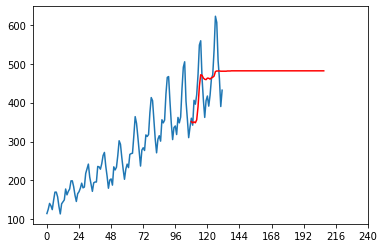

In [31]:
y_preds = list(y_train.iloc[-12:])
for i in range(100):
    y_pred_i = model.predict(np.array(y_preds[-12:]).reshape((1,-1)))[0]
    y_preds.append(y_pred_i)
    
    
plt.plot(range(N), data.y)
plt.plot(range(n_train, n_train+100), y_preds[12:], color = "red")

plt.xticks(np.arange(0, 250, 24))
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [33]:
trend_model = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                            LinearRegression())

In [34]:
trend_model.fit(np.array(range(n_train)).reshape((-1,1)), y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

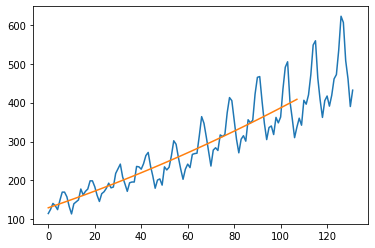

In [35]:
t_train = np.array(range(n_train)).reshape((-1,1))

trend_pred = trend_model.predict(t_train)

plt.plot(range(N), data.y)
plt.plot(range(n_train), trend_pred)
plt.show()

In [36]:
residuals_train = y_train-trend_pred

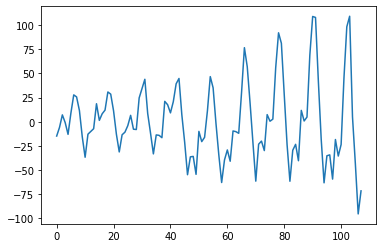

In [37]:
plt.plot(range(n_train), residuals_train)
plt.show()

In [38]:
residual_model = RandomForestRegressor(max_depth=5)
residual_model.fit(X_train, residuals_train)

RandomForestRegressor(max_depth=5)

In [39]:
t_test = np.array(range(n_train, N)).reshape((-1,1))

In [40]:
y_test_pred = trend_model.predict(t_test) + residual_model.predict(X_test)

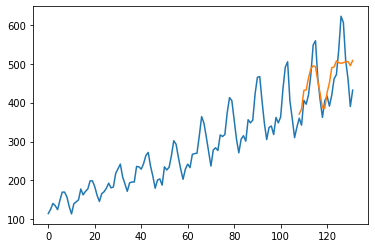

In [41]:
plt.plot(range(N), data.y)
plt.plot(range(n_train, N), y_test_pred)
plt.show()

In [42]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.09527093549440042

## Wielowymiarowe dane czasowe

In [43]:
data = pd.read_csv("data/Bike-Sharing-Dataset/hour.csv", index_col=0)
data["weekday"] = data.weekday.replace({0:7})
data = data.rename({"dteday": "date", "yr": "year", "mnth": "month", "hr":"hour", 
                    "cnt": "demand"}, axis=1)
data.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,demand
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Źródło: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#

In [44]:
data = data.drop(["casual", "registered"], axis=1)
data.shape

(17379, 14)

In [45]:
data.tail()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,demand
instant,,,,,,,,,,,,,,
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


In [46]:
from datetime import datetime

def create_date_with_hour(date, hour):
    date_parsed = datetime.strptime(date, "%Y-%m-%d")
    date_with_hour = datetime(date_parsed.year, date_parsed.month, date_parsed.day, hour)
    return date_with_hour

data["date"] = data[["date", "hour"]].apply(lambda row: create_date_with_hour(row["date"], 
                                                                              row["hour"]), 
                                            axis=1)
data = data.set_index("date")

In [47]:
data.head()

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,demand
date,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


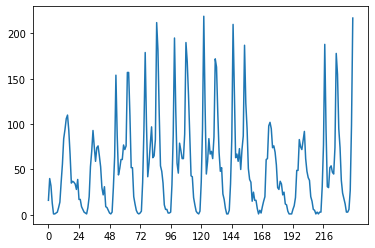

In [48]:
plt.plot(range(240), data.demand.iloc[:240])
plt.xticks(np.arange(0, 240, 24))
plt.show()

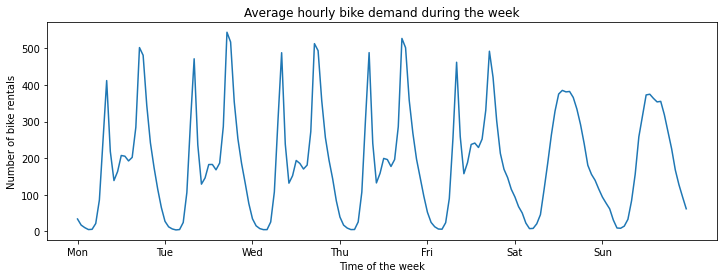

In [49]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = data.groupby(["weekday", "hour"]).mean()["demand"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

## Definicja problemu

In [50]:
data.head()

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,demand
date,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


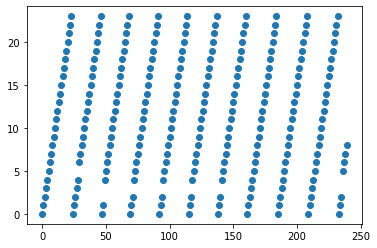

In [51]:
plt.scatter(range(240), data.hour.iloc[:240])
plt.show()

In [52]:
from datetime import timedelta

def get_next(date, data):
    next_hour = date + timedelta(hours=1)
    if next_hour in data.index:
        return data.demand.loc[next_hour]
    else:
        return np.nan
    
data["y"] = data.apply(lambda x: get_next(x.name, data), axis=1)

In [53]:
data.head()

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,demand,y
date,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,40.0
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,32.0
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,13.0
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1.0
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1.0


In [54]:
data.iloc[25:30]

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,demand,y
date,,,,,,,,,,,,,,
2011-01-02 01:00:00,1,0,1,1,0,7,0,2,0.44,0.4394,0.94,0.2537,17,9.0
2011-01-02 02:00:00,1,0,1,2,0,7,0,2,0.42,0.4242,1.00,0.2836,9,6.0
2011-01-02 03:00:00,1,0,1,3,0,7,0,2,0.46,0.4545,0.94,0.1940,6,3.0
2011-01-02 04:00:00,1,0,1,4,0,7,0,2,0.46,0.4545,0.94,0.1940,3,NaN
2011-01-02 06:00:00,1,0,1,6,0,7,0,3,0.42,0.4242,0.77,0.2985,2,1.0


In [55]:
data = data.dropna()
data.shape

(17303, 14)

In [56]:
data = data.drop(["year"], axis=1) 
# zmienne season, weekday i opcjonalnie month - kategoryczne

data.head()

,season,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,demand,y
date,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,40.0
2011-01-01 01:00:00,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,32.0
2011-01-01 02:00:00,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,13.0
2011-01-01 03:00:00,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1.0
2011-01-01 04:00:00,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1.0
